# Load Colorectal Cancer data

In [1]:
## The following code ensures that all functions and init files are reloaded before executions.
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path
from insitupy import InSituData, InSituExperiment, CACHE

In [ ]:
config_path = Path("./csv/sample_configuration.csv")
out_path = Path("out")
out_path.mkdir(exist_ok=True)

In [4]:
exp = InSituExperiment.from_config(config_path, mode="xenium")

100%|██████████| 7/7 [00:12<00:00,  1.76s/it]


In [5]:
exp

InSituExperiment with 7 samples:
           uid  CITAR slide_id sample_id Region  ...           Type     Sample Name Metastasis type              HE           panCK
0     65babf4b  +++--  0003621  Region_1      1  ...  primary tumor  Colorectal ...             NaN  ../data/000...  ../data/000...
1     4856f03a  +++--  0003621  Region_2      2  ...     metastasis  Lymph node ...     synchronous  ../data/000...  ../data/000...
2     dc3c9ebf  +++--  0003621  Region_3      3  ...     metastasis  Lung metast...    asynchronous  ../data/000...  ../data/000...
3     984c3c6b  +++--  0003621  Region_4      4  ...     metastasis  Liver metas...     synchronous  ../data/000...  ../data/000...
4     2f211922  +++--  0003991  Region_1      1  ...  primary tumor  Colorectal ...             NaN  ../data/000...  ../data/000...
5     369a8637  +++--  0003991  Region_2      2  ...     metastasis  Lymph node ...     synchronous  ../data/000...  ../data/000...
6     6bc5f498  +++--  0003991  Region_3   

In [6]:
from insitupy import register_images

In [7]:
for meta, xd in exp.iterdata():
    print(meta["uid"])

    # get absolute image paths
    he_path = Path(meta["HE"]).resolve()
    ihc_path = Path(meta["panCK"]).resolve()

    register_images(
        data=xd,
        image_to_be_registered=he_path,
        image_type="histo",
        channel_names='HE',
        template_image_name="nuclei",
        save_registered_images=True,
        output_dir=out_path
        )

    register_images(
        data=xd,
        image_to_be_registered=ihc_path,
        image_type="histo",
        channel_names='panCK',
        template_image_name="nuclei",
        save_registered_images=True,
        output_dir=out_path
        )

65babf4b
	Processing following histo images: HE
		Loading images to be registered...
		Run color deconvolution
Load and scale image data containing all channels.
		Load image into memory...
		Load template into memory...
		Rescale image and template to save memory.
			Rescaled from (29951, 23611, 3) to following dimensions: (4505, 3551, 3)
			Rescaled from (27352, 34139) to following dimensions: (3579, 4468)
		Convert scaled images to 8 bit
Load and scale image data containing only the channels required for registration.
		Rescale image and template to save memory.
			Rescaled from (29950, 23610) to following dimensions: (4505, 3551)
			Rescaled from (27352, 34139) to following dimensions: (3579, 4468)
		Convert scaled images to 8 bit
		Extract common features from image and template
		2025-06-20 11:20:44: Get features...
			Adjust contrast with clip method...
			Method: SIFT...
		2025-06-20 11:20:52: Compute matches...
		2025-06-20 11:21:02: Filter matches...
			Sufficient number of g

In [8]:
data_path = out_path / "crc_data"

In [9]:
exp.saveas(data_path, overwrite=True)

100%|██████████| 7/7 [14:45<00:00, 126.43s/it]


In [10]:
exp = InSituExperiment.read(data_path)
exp.load_all()

100%|██████████| 7/7 [00:04<00:00,  1.51it/s]


In [12]:
exp

InSituExperiment with 7 samples:
           uid  CITAR  slide_id sample_id  Region  ...           Type     Sample Name Metastasis type              HE           panCK
0     65babf4b  +++--      3621  Region_1       1  ...  primary tumor  Colorectal ...             NaN  ../data/000...  ../data/000...
1     4856f03a  +++--      3621  Region_2       2  ...     metastasis  Lymph node ...     synchronous  ../data/000...  ../data/000...
2     dc3c9ebf  +++--      3621  Region_3       3  ...     metastasis  Lung metast...    asynchronous  ../data/000...  ../data/000...
3     984c3c6b  +++--      3621  Region_4       4  ...     metastasis  Liver metas...     synchronous  ../data/000...  ../data/000...
4     2f211922  +++--      3991  Region_1       1  ...  primary tumor  Colorectal ...             NaN  ../data/000...  ../data/000...
5     369a8637  +++--      3991  Region_2       2  ...     metastasis  Lymph node ...     synchronous  ../data/000...  ../data/000...
6     6bc5f498  +++--      39

In [13]:
from insitupy.plotting import plot_overview

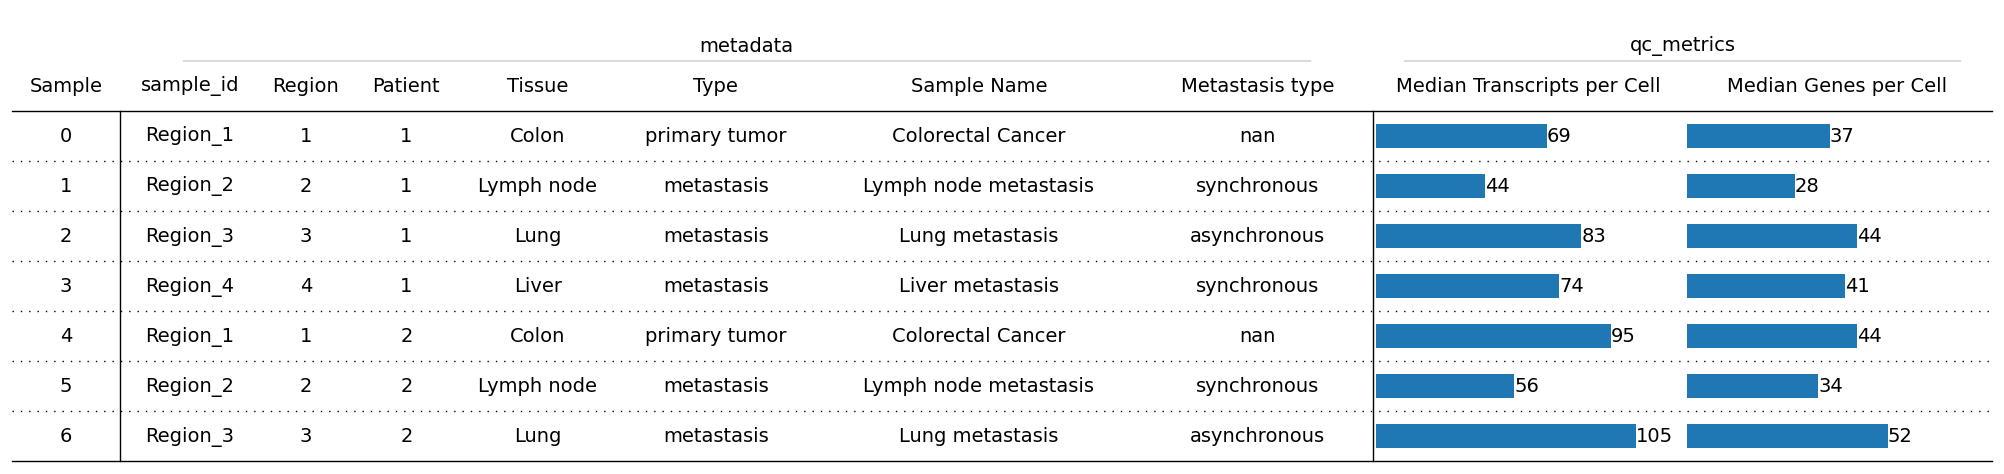

In [16]:
plot_overview(data=exp, columns_to_plot=['sample_id', 'Region', 'Patient', 'Tissue', 'Type', 'Sample Name', 'Metastasis type'],
                  #savepath="out/overview.pdf"
                  )

In [21]:
exp.show(4)

Viewer(camera=Camera(center=(0.0, 2539.5875, 3929.3375), zoom=0.05137495606089283, angles=(0.0, 0.0, 90.0), perspective=0.0, mouse_pan=True, mouse_zoom=True), cursor=Cursor(position=(1.0, 1.0), scaled=True, size=1, style=<CursorStyle.STANDARD: 'standard'>), dims=Dims(ndim=2, ndisplay=2, last_used=0, range=((0.0, 5079.3875, 0.2125), (0.0, 7858.8875, 0.2125)), current_step=(11951, 18491), order=(0, 1), axis_labels=('0', '1')), grid=GridCanvas(stride=1, shape=(-1, -1), enabled=False), layers=[<Image layer 'nuclei' at 0x2b51e5bdb20>, <Image layer 'HE' at 0x2b51e5cdaf0>], help='use <2> for transform', status='Ready', tooltip=Tooltip(visible=False, text=''), theme='dark', title='0003991: Region_1-5316_18_IVC', mouse_over_canvas=False, mouse_move_callbacks=[], mouse_drag_callbacks=[], mouse_double_click_callbacks=[], mouse_wheel_callbacks=[<function dims_scroll at 0x000002B4E61F3AF0>], _persisted_mouse_event={}, _mouse_drag_gen={}, _mouse_wheel_gen={}, keymap={})

## Export transcripts for Proseg

In the beginning I used following code to export the transcripts and filter for certain feature patterns and quality thresholds:

```Python
exclude_pattern = "BLANK|NegControl|antisense_"
min_qv = 20

for meta, data in exp.iterdata():
    print(data.sample_id)

    # extract transcript dataframe
    transcript_df = data.transcripts

    # remove genes with exclusion pattern
    transcript_df = transcript_df[~transcript_df["feature_name"].str.contains(exclude_pattern)]

    # remove low quality genes
    transcript_df = transcript_df[transcript_df["qv"] >= min_qv]

    transcript_df.to_csv(transcript_out / f"transcripts__{meta['slide_id']}__{meta['sample_id']}.csv",
                            single_file=True)
```

However, this did not work with the CRC data and caused following error in proseg:

```Bash
thread '<unnamed>' panicked at /dss/dsshome1/0C/ge37voy2/.cargo/registry/src/index.crates.io-6f17d22bba15001f/ndarray-0.16.1/src/impl_constructors.rs:329:20:
ndarray: Shape too large, product of non-zero axis lengths overflows isize
```

I was not able to find the problem but it did only occur after filtering and seemed to be independent of the non-unique indices caused by `dask.dataframe` and of the byte strings. But no idea what it was in the end.

Alternatively, one can copy the transcript files from the raw Xenium output directory as described below and use these `csv.gz` files for proseg.

In [18]:
from pathlib import Path
import shutil
from insitupy.io.files import read_json

def copy_file_from_xenium_output(
    source_dir,
    target_dir,
    filename,
    xenium_experiment_filename: str = "experiment.xenium"
    ):
    # Ensure the target directory exists
    target_path = Path(target_dir)
    target_path.mkdir(parents=True, exist_ok=True)

    # Iterate through all folders in the source directory
    for folder in Path(source_dir).glob('*'):
        if folder.is_dir():
            # check if it is a Xenium output directory
            xenium_file = folder / xenium_experiment_filename
            if xenium_file.exists():
                print(f"Found Xenium output directory: {folder}")
                # Check if the specified file exists in the current folder
                file_path = folder / filename

                # get metadata
                region_name = read_json(xenium_file)["region_name"]
                if file_path.exists():
                    # Copy the file to the target directory
                    shutil.copy(file_path, target_path / f"{region_name}__{filename}")
                    print(f"\tCopied {file_path} to {target_path}")
                else:
                    print("\tFile not found in directory.")


In [19]:
transcript_out = out_path / "transcripts_export"
transcript_out.mkdir(exist_ok=True)

In [27]:
from insitupy.io.files import copy_files_from_xenium_output

In [29]:
source_directory = Path("../data/")
target_directory = transcript_out
file_to_copy = "transcripts.csv.gz"

In [ ]:
copy_files_from_xenium_output(
    source_dir=source_directory,
    target_dir=target_directory,
    filename=file_to_copy,
    xenium_filename= "experiment.xenium"
)

Found Xenium output directory: ..\data\output-XETG00050__0003621__Region_1__20230504__121954
	Copied ..\data\output-XETG00050__0003621__Region_1__20230504__121954\transcripts.csv.gz to out\transcripts_export
Found Xenium output directory: ..\data\output-XETG00050__0003621__Region_2__20230504__121954
	Copied ..\data\output-XETG00050__0003621__Region_2__20230504__121954\transcripts.csv.gz to out\transcripts_export
Found Xenium output directory: ..\data\output-XETG00050__0003621__Region_3__20230504__121954
	Copied ..\data\output-XETG00050__0003621__Region_3__20230504__121954\transcripts.csv.gz to out\transcripts_export
Found Xenium output directory: ..\data\output-XETG00050__0003621__Region_4__20230504__121954
	Copied ..\data\output-XETG00050__0003621__Region_4__20230504__121954\transcripts.csv.gz to out\transcripts_export
Found Xenium output directory: ..\data\output-XETG00050__0003991__Region_1__20230504__121954
	Copied ..\data\output-XETG00050__0003991__Region_1__20230504__121954\trans

## Run proseg

Proseg was run on the LRZ cluster using `min_qv=20` and `excluded_patterns="^(Deprecated|NegControl|Unassigned|Intergenic|BLANK|antisense)"`. For parallel processing a slurm job array was used.

## Add proseg data

In [ ]:
source_directory / ""

WindowsPath('../data')

In [31]:
exp

InSituExperiment with 7 samples:
           uid  CITAR  slide_id sample_id  Region  ...           Type     Sample Name Metastasis type              HE           panCK
0     65babf4b  +++--      3621  Region_1       1  ...  primary tumor  Colorectal ...             NaN  ../data/000...  ../data/000...
1     4856f03a  +++--      3621  Region_2       2  ...     metastasis  Lymph node ...     synchronous  ../data/000...  ../data/000...
2     dc3c9ebf  +++--      3621  Region_3       3  ...     metastasis  Lung metast...    asynchronous  ../data/000...  ../data/000...
3     984c3c6b  +++--      3621  Region_4       4  ...     metastasis  Liver metas...     synchronous  ../data/000...  ../data/000...
4     2f211922  +++--      3991  Region_1       1  ...  primary tumor  Colorectal ...             NaN  ../data/000...  ../data/000...
5     369a8637  +++--      3991  Region_2       2  ...     metastasis  Lymph node ...     synchronous  ../data/000...  ../data/000...
6     6bc5f498  +++--      39

In [35]:
#proseg_path = out_path / "prosegruns/filtered"
#proseg_folders = [elem for elem in proseg_path.iterdir() if elem.is_dir()]
proseg_folders = [elem for elem in source_directory.iterdir() if elem.stem.startswith("proseg")]

In [36]:
proseg_folders

[WindowsPath('../data/proseg__0003621__Region_1'),
 WindowsPath('../data/proseg__0003621__Region_2'),
 WindowsPath('../data/proseg__0003621__Region_3'),
 WindowsPath('../data/proseg__0003621__Region_4'),
 WindowsPath('../data/proseg__0003991__Region_1'),
 WindowsPath('../data/proseg__0003991__Region_2'),
 WindowsPath('../data/proseg__0003991__Region_3')]

In [39]:

for meta, xd in exp.iterdata():
    uname = f"{meta['slide_id']}__{meta['sample_id']}" # get unique name for sample
    print(uname)

    # find matching folder
    #matching_folder = [f for f in proseg_folders if f.stem == xd.sample_id.split('-')[-1]]
    matching_folder = [f for f in proseg_folders if uname in f.stem]
    assert len(matching_folder) == 1, f"No or more than one possible folder found: {matching_folder}"
    matching_folder = matching_folder[0]

    xd.cells.add_proseg(matching_folder)

3621__Region_1
Convert counts to float32.
3621__Region_2
Convert counts to float32.
3621__Region_3
Convert counts to float32.
3621__Region_4
Convert counts to float32.
3991__Region_1
Convert counts to float32.
3991__Region_2
Convert counts to float32.
3991__Region_3
Convert counts to float32.


In [40]:
exp.save()

100%|██████████| 7/7 [01:28<00:00, 12.67s/it]
